In [1]:
import os
import math
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.cluster.vq import kmeans, vq

In [2]:
stock_dir = r'..\stocks'

In [3]:
random.seed(69)
df = pd.DataFrame()

for i in os.listdir(stock_dir):
    if 'csv' not in i:
        stock_list = os.listdir(os.path.join(stock_dir, i))
        random.shuffle(stock_list)
        for stock in stock_list[:10]:
            df_temp = pd.read_csv(os.path.join(stock_dir, i, stock), usecols=['Close Price', 'Series'])
            df_temp = df_temp.loc[df_temp['Series'] == 'EQ']
            df[stock.split('.')[0]] = df_temp['Close Price']

In [4]:
df.head()

,BPCL,MARUTI,INFY,ADANIPORTS,HINDALCO,SUNPHARMA,TCS,LT,ITC,TITAN,...,SUZLON,RAYMOND,LUXIND,IRCON,CENTURYPLY,GUJALKALI,RCOM,JETAIRWAYS,IDFC,VENKEYS
0,727.85,6823.90,951.55,356.20,198.45,654.45,2365.10,1742.40,277.95,483.65,...,19.6,772.80,819.60,415.3,266.65,457.35,32.00,527.50,63.70,1169.70
1,733.30,6953.95,955.00,354.50,196.50,652.35,2429.15,1740.70,283.45,488.30,...,19.7,785.00,817.50,427.0,266.10,455.25,32.10,534.15,64.25,1177.00
2,727.45,6958.20,952.80,348.55,198.85,650.90,2455.35,1755.45,281.65,481.75,...,19.9,783.65,819.80,421.4,264.85,472.65,31.95,528.90,63.35,1188.00
3,714.90,6831.05,961.75,347.90,194.00,653.95,2536.20,1722.60,277.90,471.65,...,20.0,746.95,820.05,407.1,260.35,461.85,31.05,522.70,61.50,1156.90
4,702.45,6790.55,957.95,349.45,191.00,653.15,2507.15,1724.55,286.20,471.15,...,20.6,723.10,817.80,399.8,254.05,455.35,30.55,520.40,61.15,1161.65


In [5]:
returns = df.pct_change().mean() * 252
returns = pd.DataFrame(returns)
returns.columns = ['Returns']
returns['Volatility'] = df.pct_change().std() * math.sqrt(252)
returns.head()

,Returns,Volatility
BPCL,-0.261420,0.436424
MARUTI,0.010914,0.226135
INFY,-0.025583,0.419147
ADANIPORTS,0.060499,0.309752
HINDALCO,0.040378,0.337104


In [13]:
data = returns.values
data[:5]

array([[-0.26141977,  0.43642408],
       [ 0.01091379,  0.22613549],
       [-0.02558282,  0.41914671],
       [ 0.06049886,  0.30975176],
       [ 0.04037757,  0.33710399]])

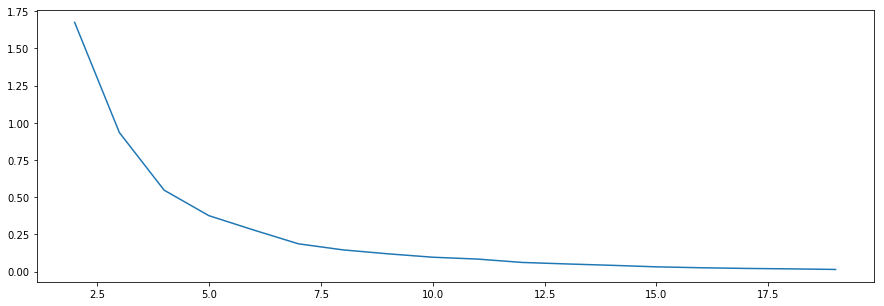

In [7]:
X, wcss = data, []
for k in range(2, 20):
    k_means = KMeans(k)
    k_means.fit(X)
    wcss.append(k_means.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 20), wcss)
# k = 5

In [9]:
centroid, _ = kmeans(data, 5)
idx, _ = vq(data, centroid)

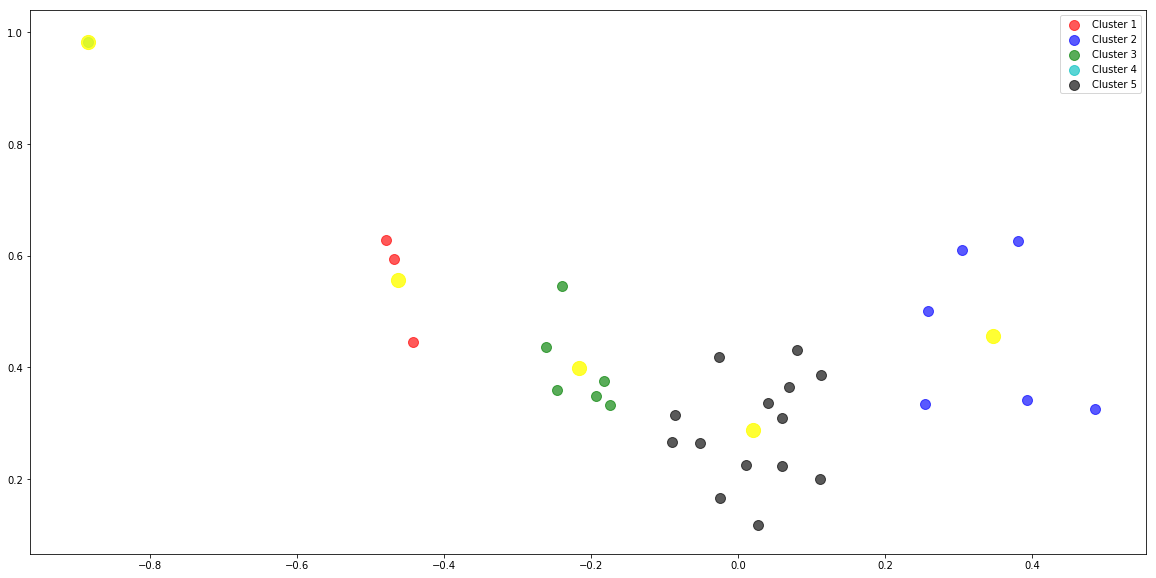

In [12]:
plt.figure(figsize=(20, 10))
plt.scatter(X[idx == 0, 0], X[idx == 0, 1], s=100, c='r', label='Cluster 1', alpha=0.65)
plt.scatter(X[idx == 1, 0], X[idx == 1, 1], s=100, c='b', label='Cluster 2', alpha=0.65)
plt.scatter(X[idx == 2, 0], X[idx == 2, 1], s=100, c='g', label='Cluster 3', alpha=0.65)
plt.scatter(X[idx == 3, 0], X[idx == 3, 1], s=100, c='c', label='Cluster 4', alpha=0.65)
plt.scatter(X[idx == 4, 0], X[idx == 4, 1], s=100, c='k', label='Cluster 5', alpha=0.65)
plt.scatter(centroid[:, 0], centroid[:, 1], s=200, c='yellow', alpha=0.8)
plt.legend()

In [20]:
datails = [(name, cluster) for name, cluster in zip(returns.index, idx)]
labels = ['Stock SYmbol', 'Cluster']
dframe = pd.DataFrame.from_records(datails, columns=labels)
dframe.set_index('Cluster')

,Stock SYmbol
Cluster,
2,BPCL
4,MARUTI
4,INFY
4,ADANIPORTS
4,HINDALCO
2,SUNPHARMA
4,TCS
4,LT
4,ITC
